In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data={}
n = 1000
for a in [1,2,4,8,16]:
    data[a]=[]
    c = 2 * a
    for k in range(0,10):
        G = nx.DiGraph()
        for i in range(0,n):
            G.add_node(i)
            for j in range(0,int(np.random.normal(c, c/5, 1)[0])):
                if random.uniform(0,1) < c/(c+a) or (i==0 and j==0):
                    G.add_edge(i,random.randint(0,i))
                else:
                    l = list(G.out_edges())
                    if len(l) > 0 : G.add_edge(i,random.choices(l,k=1)[0][1])
        data[a].append([d for v,d in G.in_degree()])

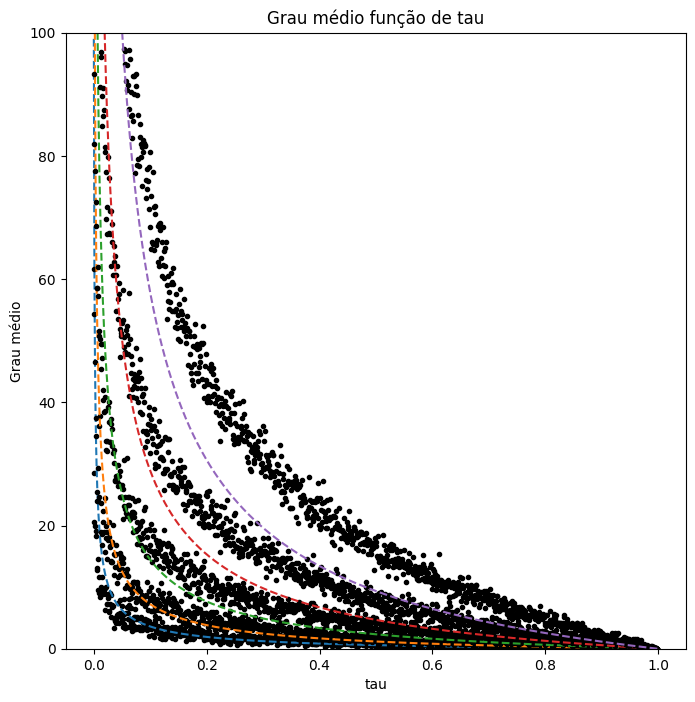

In [3]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
for a in [1,2,4,8,16]:
    df = pd.DataFrame(data=data[a])
    plt.plot([x/n for x in range(0,n)],df.mean(axis=0), 'k.')
    plt.plot([x/n for x in range(0,n)],[a*(x/n)**(-2/3)-a for x in range(1,n+1)], '--')
ax.set_ylim([0, 100])
ax.set_title("Grau médio função de tau") 
ax.set_xlabel("tau")
ax.set_ylabel("Grau médio")
plt.show()